# Data Preproccessing

In [1]:
import numpy as np
import pandas as pd
import os.path
import tensorflow as tf
import keras
from tensorflow.keras import activations
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

match_df = pd.read_csv("data/match.csv", sep=",")
match_df = match_df.query("game_mode == 22")
match_df

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151


In this part we are removing non-competitive game modes from our dataset to make it more closer to in real life data. In competitive game modes players take the game more seriously and penalty for griefing the game is harsher.

In [2]:
match_outcomes_df = pd.read_csv("data/match_outcomes.csv", sep=",")
match_outcomes_df

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0
...,...,...,...,...,...,...,...,...,...,...
1828583,1930327119,2898,0,4161,27088,0,1447311134,14,0,0
1828584,1930333522,276597,47600,26597,-191452592,147872,1447311476,14,1,1
1828585,1930333522,35144,-198295236,41272,0,151139,1447311476,14,0,0
1828586,1930334829,0,2850,-119710321,188881,0,1447311544,14,0,0


In [3]:
objectives_df = pd.read_csv("data/objectives.csv", sep=",")
objectives_df

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3
...,...,...,...,...,...,...,...,...,...
1173391,49999,64.0,-1,-1,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,2565,64
1173392,49999,NaN,9,-1,9.0,CHAT_MESSAGE_TOWER_KILL,3.0,2611,3
1173393,49999,NaN,3,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,3.0,2707,200
1173394,49999,NaN,7,-1,7.0,CHAT_MESSAGE_AEGIS,NaN,2730,0


In [4]:
first_blood_df = objectives_df.query("subtype == 'CHAT_MESSAGE_FIRSTBLOOD'")
first_blood_df["first_blood_team"] = np.where(first_blood_df["player1"] < 5, 1, 0)
first_blood_df = first_blood_df[["match_id", "first_blood_team"]]
first_blood_df

<ipython-input-4-1d79a3a376d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_blood_df["first_blood_team"] = np.where(first_blood_df["player1"] < 5, 1, 0)


,match_id,first_blood_team
0,0,1
21,1,1
47,2,0
68,3,0
95,4,1
...,...,...
1173284,49995,1
1173311,49996,0
1173327,49997,1
1173353,49998,1


We are getting first blood data from objectives dataset which is the first kill of the game and it will be used to compare it to our win label. 
Player id's are between 0 and 9 and player id's lower than 5 means radiant team's player taken the first blood.

In [5]:
roshan_df = objectives_df.query("subtype == 'CHAT_MESSAGE_ROSHAN_KILL'")
roshan_df["roshan_team"] = np.where(roshan_df["player1"] < 5, 1, 0).astype(float)
roshan_df = roshan_df.loc[roshan_df.groupby("match_id")["time"].idxmax()]
roshan_df = roshan_df[["match_id","roshan_team"]]
roshan_df 

<ipython-input-5-2b49eb74e949>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roshan_df["roshan_team"] = np.where(roshan_df["player1"] < 5, 1, 0).astype(float)


,match_id,roshan_team
8,0,1.0
30,1,1.0
60,2,1.0
91,3,1.0
110,4,1.0
...,...,...
1173274,49994,1.0
1173298,49995,1.0
1173336,49997,1.0
1173366,49998,1.0


Similiar to first blood we are taking a Non-Player Controlled(NPC) unit's kills from the game, when this NPC is killed it grants a team significiant advantage this is why we are going to compare it with our win condition.

In [6]:
tower_df = objectives_df.query("subtype == 'CHAT_MESSAGE_TOWER_KILL'")
tower_df["tower_team"] = np.where(tower_df["player1"] < 5, 1, 0).astype(float)
tower_df = tower_df.groupby(["match_id", "tower_team"]).size().reset_index(name='tower_count')
tower_df["tower_count"] = np.where(tower_df["tower_team"] == 0, -tower_df["tower_count"], tower_df["tower_count"]).astype(float)
tower_df = tower_df[["match_id", "tower_count"]].groupby(["match_id"]).sum().reset_index()

<ipython-input-6-4e7ad6b554b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tower_df["tower_team"] = np.where(tower_df["player1"] < 5, 1, 0).astype(float)


Destroying towers are considered one of the most important parts of the game so we will include it to our features.

In [7]:
df = pd.merge(match_df, first_blood_df, how="inner", on="match_id").merge(roshan_df, on="match_id").merge(tower_df, on="match_id")
df = df[["first_blood_team", "roshan_team", "radiant_win", "tower_count"]]
df["radiant_win"] = df["radiant_win"].astype(float)
df

,first_blood_team,roshan_team,radiant_win,tower_count
0,1,1.0,1.0,8.0
1,1,1.0,0.0,1.0
2,0,1.0,0.0,4.0
3,0,1.0,0.0,4.0
4,1,1.0,1.0,11.0
...,...,...,...,...
41672,0,1.0,0.0,1.0
41673,1,1.0,1.0,6.0
41674,1,1.0,1.0,12.0
41675,1,1.0,1.0,10.0


Joining all of our trasformed dataframe to create a data model.

# Machine Learning

In [8]:
df_train = df.sample(frac=0.8,random_state=9)
df_test = df.drop(df_train.index)

feature_columns = []
feature_columns.append(tf.feature_column.numeric_column("first_blood_team"))
feature_columns.append(tf.feature_column.numeric_column("roshan_team"))
feature_columns.append(tf.feature_column.numeric_column("tower_count"))
feature_layer = layers.DenseFeatures(feature_columns)

In this part we are splitting our data to train and test with 80/20 split and adding our features to model

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
2084/2084 [==============================] - 1s 470us/step - loss: 0.1937 - accuracy: 0.9196
Epoch 2/10
2084/2084 [==============================] - 1s 475us/step - loss: 0.1530 - accuracy: 0.9267
Epoch 3/10
2084/2084 [==============================] - 1s 464us/step - loss: 0.1477 - accuracy: 0.9293
Epoch 4/10
2084/2084 [==============================] - 1s 462us/step - loss: 0.1466 - accuracy: 0.9289
Epoch 5/10
2084/2084 [==============================] - 1s 457us/step - loss: 0.1455 - accuracy: 0.9290
Epoch 6/10
2084/2084 [==============================] - 1s 459us/step - loss: 0.1445 - accuracy: 0.9296
Epoch 7/10
2084/2084 [==============================] - 1s 457us/step - loss: 0.1438 - accuracy: 0.9297
Epoch 8/10
2084/2084 [==============================] - 1s 461us/step - loss: 0.1433 - accuracy: 0.9297
Epoch 9/10
2084/2084 [==============================] - 1s

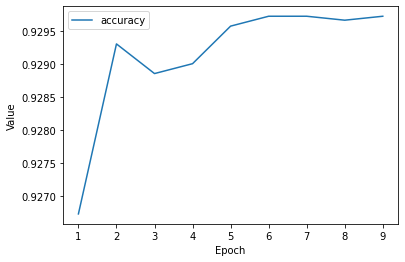

In [9]:
epochs = 10
classification_threshold = 0.6
batch_size = 16
learning_rate = 0.001
#features = df[["first_blood_team","roshan_team"]].values.astype(float)
#features = df[["first_blood_team"]].values.astype(float)
#labels = df["radiant_win"].values.astype(float)

#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.3, random_state = 9)

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold)#,
      #tf.keras.metrics.Precision(name='precision', thresholds=classification_threshold),
      #tf.keras.metrics.Recall(name="recall", thresholds=classification_threshold)
]

model = tf.keras.Sequential()
model.add(feature_layer)
#model.add(layers.Activation(activations.sigmoid))
model.add(tf.keras.layers.Dense(units=20,activation='relu',name='Hidden1'))
model.add(tf.keras.layers.Dense(units=12,activation='relu',name='Hidden2'))
model.add(tf.keras.layers.Dense(units=1,name='Output'))
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=METRICS)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="categorical_hinge", metrics=METRICS)

features = {name:np.array(value) for name, value in df_train.items()}
labels = np.array(features.pop("radiant_win"))

history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs, shuffle=True)
epochs = history.epoch
hist = pd.DataFrame(history.history)

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Value")

#for m in ['accuracy', "precision", "recall"]:
for m in ['accuracy']:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

plt.legend()

Since our model is balanced evenly with both teams, we can clearly say that with these features our model is succesfull with 92.95% accuracy.